In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


trainData = pd.read_csv('./Contents/train.csv')

trainData.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
testData = pd.read_csv('./Contents/test.csv')

testData.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
trainNull = trainData.isnull().sum()
print(trainNull)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
testNull = testData.isnull().sum()
print(testNull)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
dfTrain = trainData.copy()
dfTest = testData.copy()

In [8]:
dropList = ['Name', 'Ticket', 'Cabin', 'Embarked']
dfTrain = dfTrain.drop(dropList, axis=1)

In [9]:
display(dfTrain)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


Choosing Target

In [10]:
target = dfTrain['Survived']

print(target[:5])

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


Filling the missing values

In [11]:
mean_age = dfTrain['Age'].mean() 
dfTrain['Age'].fillna(mean_age, inplace=True)  


C:\Users\smitr\AppData\Local\Temp\ipykernel_10048\3073570737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfTrain['Age'].fillna(mean_age, inplace=True)


In [12]:
print(dfTrain.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

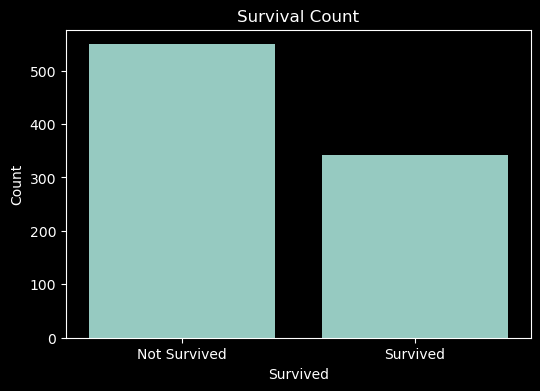

In [14]:
# Create the bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=trainData, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

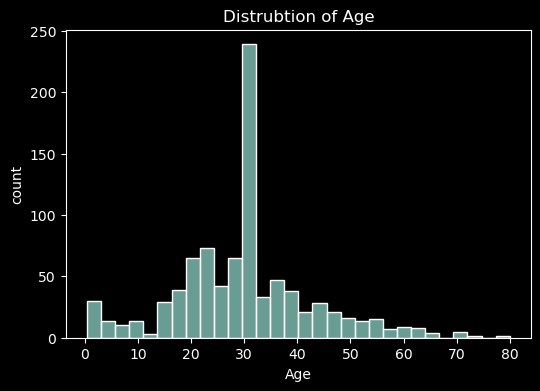

In [15]:
# Age histogram plot
plt.figure(figsize=(6, 4))
sns.histplot(data=dfTrain, x='Age')
plt.title('Distrubtion of Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

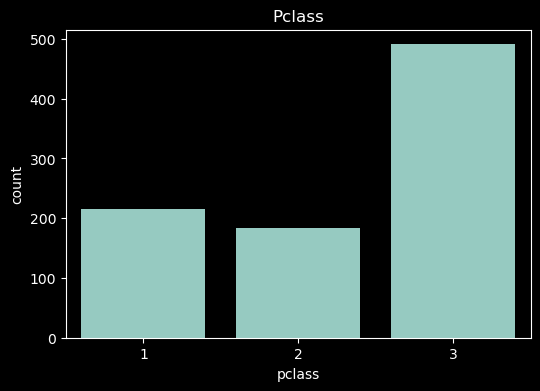

In [16]:
# count plot for the pclass
plt.figure(figsize=(6, 4))
sns.countplot(data=dfTrain, x='Pclass')
plt.title('Pclass')
plt.xlabel('pclass')
plt.ylabel('count')
plt.show()

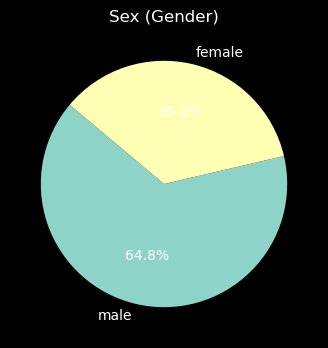

In [17]:
# Count the occurrences of each gender
gender_counts = dfTrain['Sex'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex (Gender)')
plt.show()

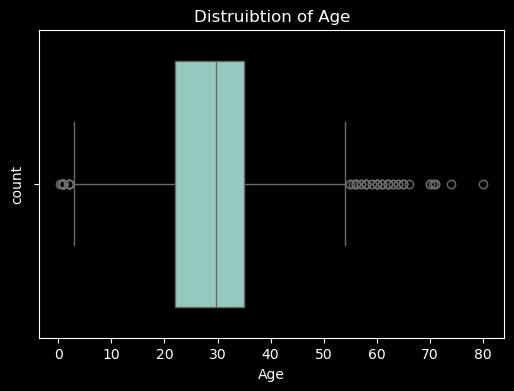

In [18]:
# boxplot for the Age
plt.figure(figsize=(6, 4))
sns.boxplot(data=dfTrain, x='Age')
plt.title('Distruibtion of Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

C:\Users\smitr\AppData\Local\Temp\ipykernel_10048\3539396167.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_fare = dfTrain.groupby(['Fare_Bin', target]).size().unstack()


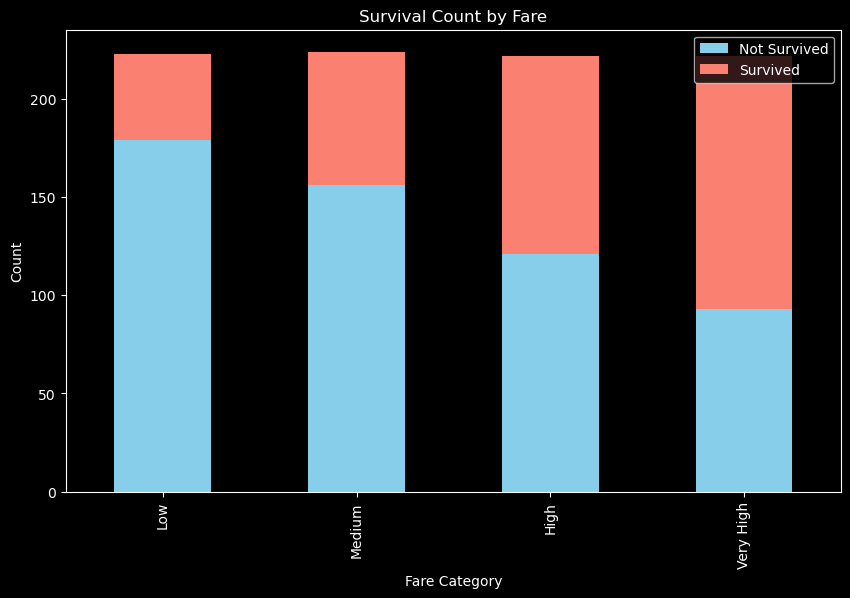

In [19]:
# Categorize the Fare into bins
fare_bins = pd.qcut(dfTrain['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Add the Fare bins to the dataframe
dfTrain['Fare_Bin'] = fare_bins

# Group the data by Fare_Bin and Survived, and count the number of occurrences
grouped_data_fare = dfTrain.groupby(['Fare_Bin', target]).size().unstack()

# Plot the stacked bar plot for Fare
grouped_data_fare.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Survival Count by Fare')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


c:\Users\smitr\anaconda3\envs\test_env\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


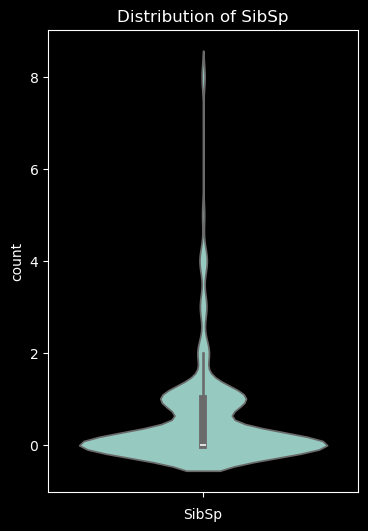

In [20]:
# Violin plot for the SibSp
plt.figure(figsize=(4, 6))
sns.violinplot(data=dfTrain, y='SibSp', orient='h')
plt.title('Distribution of SibSp')
plt.xlabel('SibSp')
plt.ylabel('count')
plt.show()

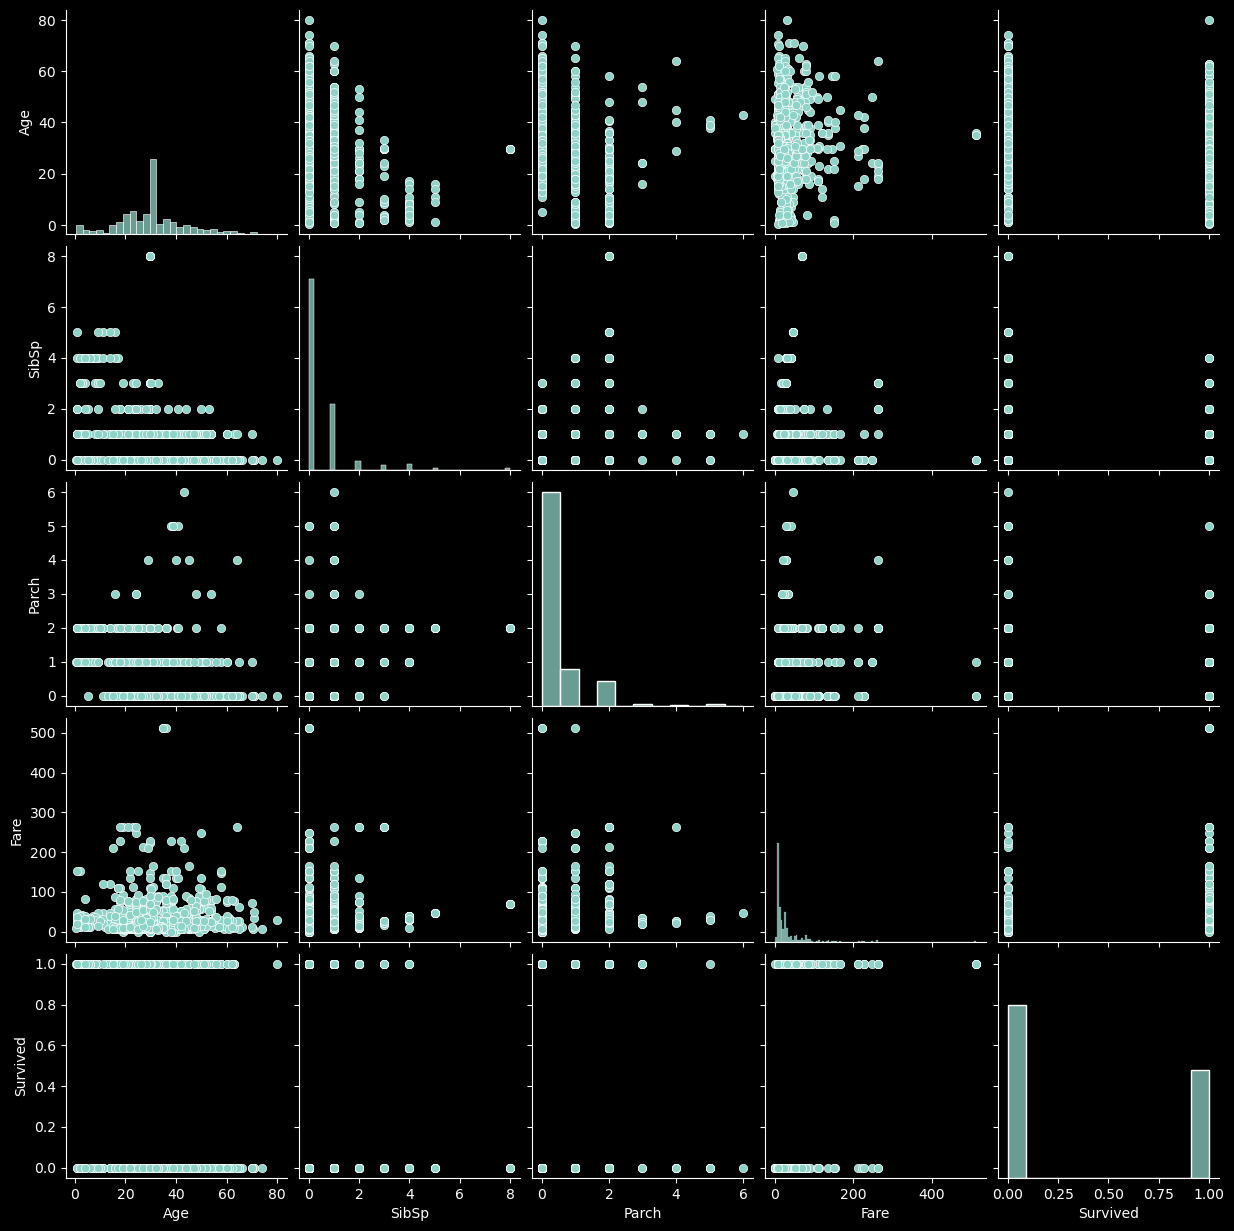

In [21]:
# Select numerical variables for the pair plot
numerical_vars = ['Age', 'SibSp', 'Parch', 'Fare']

# Convert target to a DataFrame
target_df = pd.DataFrame(target, columns=['Survived'])

# Concatenate the numerical variables DataFrame and the target DataFrame along the columns
df_with_target = pd.concat([dfTrain[numerical_vars], target_df], axis=1)

# Create the pair plot including the target variable
sns.pairplot(df_with_target)
plt.show()

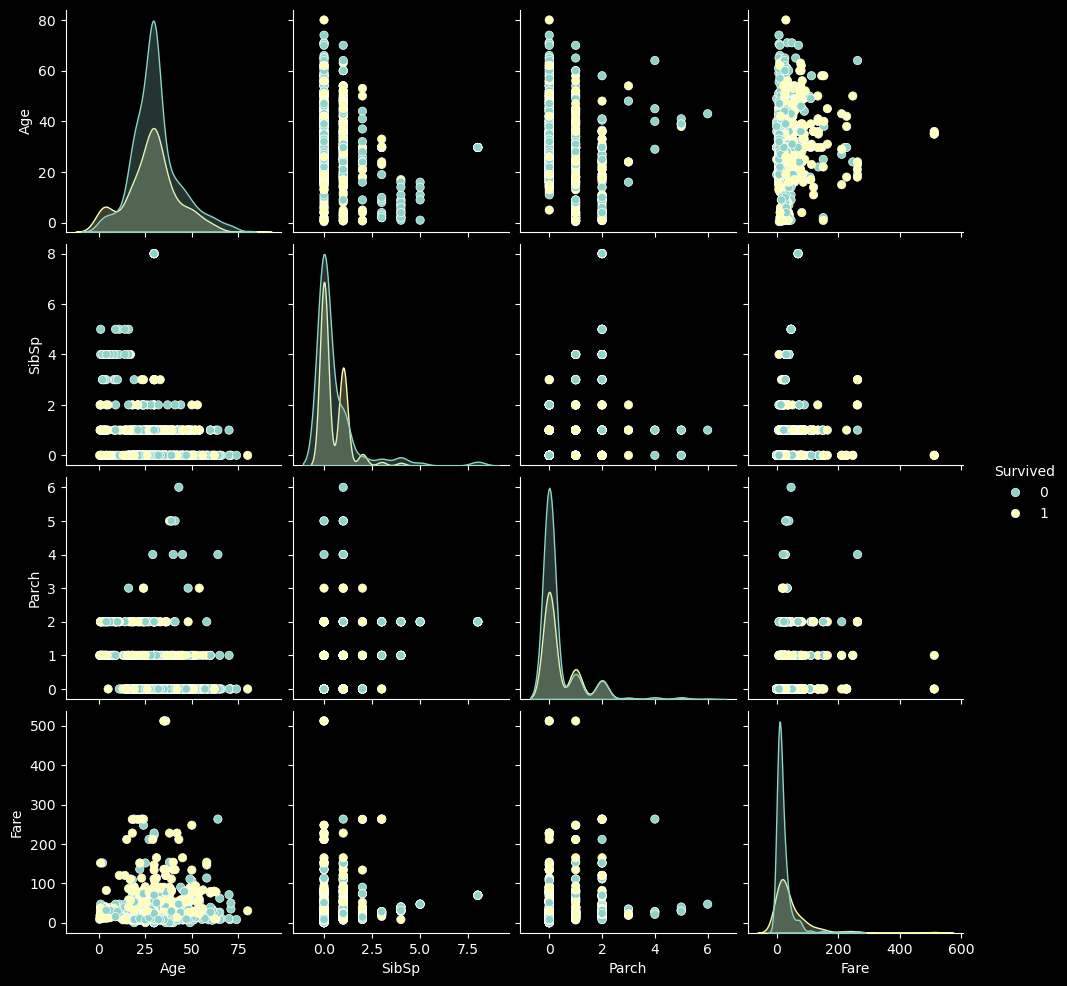

In [22]:
# Define the numerical variables of interest
numerical_vars = ['Age', 'SibSp', 'Parch', 'Fare']

# If 'Survived' is stored separately in the 'target' variable
TargetCompare = 'Survived'

# Add the target variable to the list
numerical_vars.append(TargetCompare)

# Create the pair plot
sns.pairplot(dfTrain[numerical_vars], hue=TargetCompare)
plt.show()


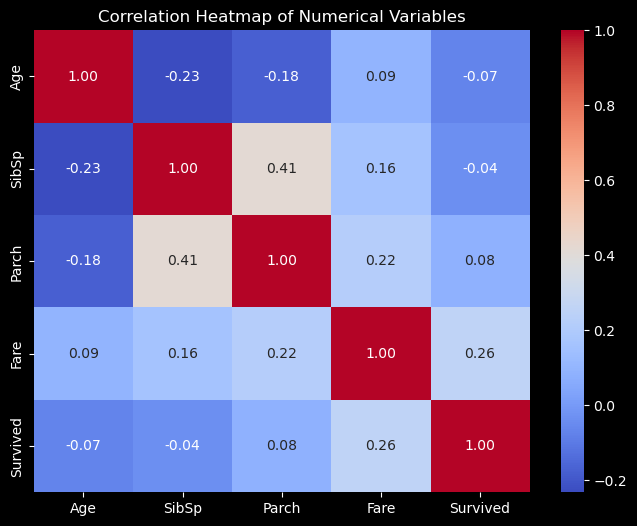

In [23]:
heatmap = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Pclass']
# Compute the correlation matrix
corr = dfTrain[numerical_vars].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [24]:
dfTrain = dfTrain.drop(columns=['Survived', 'Fare_Bin', 'PassengerId'], axis=1)
display(dfTrain)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.000000,1,0,7.2500
1,1,female,38.000000,1,0,71.2833
2,3,female,26.000000,0,0,7.9250
3,1,female,35.000000,1,0,53.1000
4,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000
887,1,female,19.000000,0,0,30.0000
888,3,female,29.699118,1,2,23.4500
889,1,male,26.000000,0,0,30.0000


In [25]:
print(target[:2])

0    0
1    1
Name: Survived, dtype: int64


Data PreProcessing

In [26]:
# Assuming df is your DataFrame containing the data
# One-hot encoding for 'Sex'
df = pd.get_dummies(dfTrain, columns=['Sex'], drop_first=True)  # drop_first=True to avoid multicollinearity

# Label encoding for 'Pclass'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Pclass'] = label_encoder.fit_transform(df['Pclass'])

In [27]:
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Sex_male  891 non-null    bool   
dtypes: bool(1), float64(2), int64(3)
memory usage: 35.8 KB


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [30]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6536312849162011


In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=5 (you can adjust k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6983240223463687


In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, Y_train)

y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.776536312849162


In [33]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb_classifier = XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7988826815642458


In [35]:
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
lr_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = lr_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


In [36]:
lr_classifier = LogisticRegression(solver='liblinear')

# Train the classifier on the training data
lr_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = lr_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7932960893854749


In [37]:
lr_classifier = LogisticRegression(max_iter=1000)

# Train the classifier on the training data
lr_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = lr_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


In [38]:
print(X_train)

     Pclass        Age  SibSp  Parch      Fare  Sex_male
331       0  45.500000      0      0   28.5000      True
733       1  23.000000      0      0   13.0000      True
382       2  32.000000      0      0    7.9250      True
704       2  26.000000      1      0    7.8542      True
813       2   6.000000      4      2   31.2750     False
..      ...        ...    ...    ...       ...       ...
106       2  21.000000      0      0    7.6500     False
270       0  29.699118      0      0   31.0000      True
860       2  41.000000      2      0   14.1083      True
435       0  14.000000      1      2  120.0000     False
102       0  21.000000      0      1   77.2875      True

[712 rows x 6 columns]


We Found that the logistic Regression is the best Accuracy for this problem with Features: 
[Pclass,	
Age,	
SibSp,	
Parch,
Fare,
Sex_male]

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#  One-hot encoding for 'Sex'
df_test = pd.get_dummies(dfTest, columns=['Sex'], drop_first=True)

# Label encoding for 'Pclass'
label_encoder = LabelEncoder()
df_test['Pclass'] = label_encoder.fit_transform(df_test['Pclass'])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_test['Age'] = imputer.fit_transform(df_test[['Age']])

# Display the transformed DataFrame
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Sex_male     418 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 33.2+ KB


In [40]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_test_imputed = pd.DataFrame(imputer.fit_transform(df_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male']]), columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male'])

# Predict the target variable for the preprocessed test data
predictions = lr_classifier.predict(df_test_imputed)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions})

# Save the predictions to a CSV file
submission_df.to_csv('./Contents/submission.csv', index=False)
